# Notebook on Keras/Tensorflow "Deep" NN Modeling for Images

By Dane Morgan with almost all materials taken from others. We will build a standard deep NN for the American Sign Language dataset (images of hands making letters in [American Sign Language](http://www.asl.gs/)). Note that this NN is not convolutional and not very "deep", but has mulitple layers and many parameters.
* Most taken from [Nvidia Deep Learning course](https://www.nvidia.com/en-us/training/).

Learning goal(s):
* Be able to build a simple deep learning Neural Network and train and aseess it using Keras/Tensorflow.
* Prepare image data for training.
Create and compile a simple model for image classification.
* Train an image classification model and observe the results.




# Colab setup

## GPUs
This lab is much faster on GPUs/TPUs. Make sure you are using GPUs or TPUs by doing the following:
* Enabling GPU. To enable GPU in your notebook, (i) Edit/Notebook Settings, or (ii) select the following menu options − Runtime / Change runtime type. See which works.
* Testing for GPU. You can easily check if the GPU is enabled by executing the following code:

In [34]:
# Test if running GPU
import tensorflow as tf
tf.test.gpu_device_name()

''

In [35]:
#from google.colab import drive
#drive.mount('/content/drive')

Here, modify the path where you saved this notebook and the associated lab files on your Google drive, if different from below (this is an example Dane Morgan had for class)

In [36]:
path = 'C:/Users/jhyan/Documents/all/UW-Madison/course_enroll/MSE_803/Lab5'
#path = '/content/drive/MyDrive/Online Filed/Dane Morgan Mixed Sharing/Projects/Courses/MSE803 F22/Dane student view/MSE803_Lab1'

Check the path name is assigned correctly.

In [37]:
!echo $path
import os
os.path.isdir(path)


C:/Users/jhyan/Documents/all/UW-Madison/course_enroll/MSE_803/Lab5


True

In [38]:
# This is needed so can import packages from a different path than standard libraries
import sys
sys.path.append(path)

# Some useful functions

In [39]:
# This plots scores for training and validation data vs. epoch.
def err_plot(acc, val_acc, loss, val_loss):
  import matplotlib.pyplot as plt

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()



# Setting up the Data
This dataset is not available via Keras in the same way that some data sets are (e.g., MNIST). This dataset is available from the website [Kaggle](http://www.kaggle.com), which is a fantastic place to find datasets and other deep learning resources. In addition to providing resources like datasets and "kernels" that are like these notebooks, Kaggle hosts competitions that you can take part in, competing with others in training highly accurate models.

If you're looking to practice or see examples of many deep learning projects, Kaggle is a great site to visit.

We will be learning to classify images into letters in the American Sign Language Alphabet (ASL). The [ASL alphabet](http://www.asl.gs/) contains 26 letters. Two of those letters (j and z) require movement, so they are not included in the training dataset. We display the images below.

Loading image from:  C:/Users/jhyan/Documents/all/UW-Madison/course_enroll/MSE_803/Lab5\images/asl.png


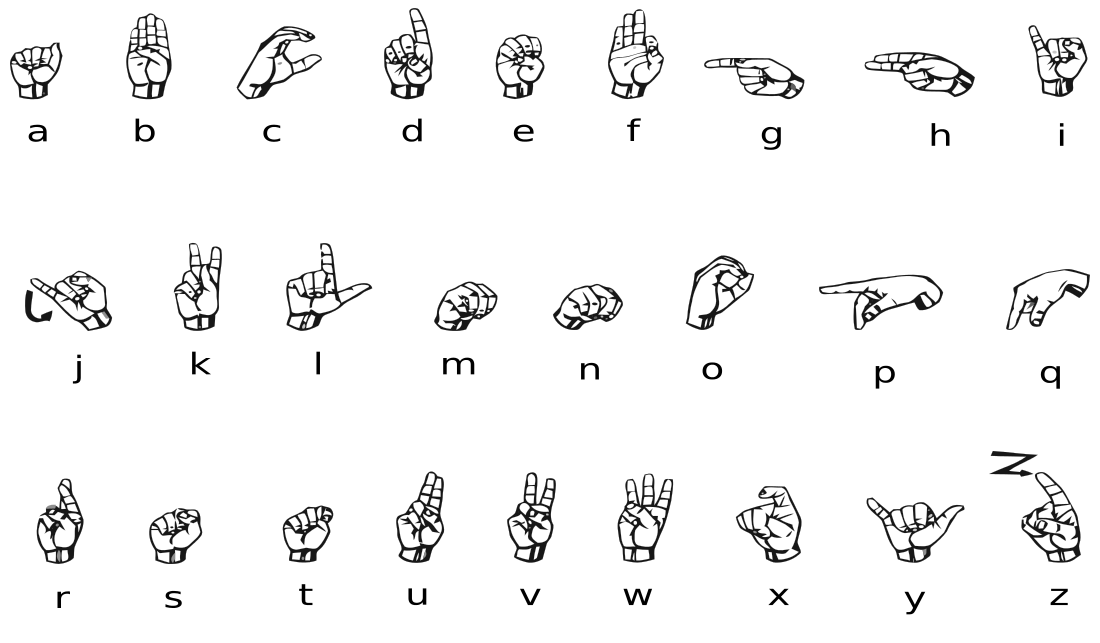

In [40]:
from IPython.display import Image
filename = os.path.join(path, 'images/asl.png')
print('Loading image from: ',filename)
display(Image(filename, width=600))

## Reading in the Data
Use Pandas DataFrame.

In [41]:
import pandas as pd
train_df = pd.read_csv(os.path.join(path, 'data/asl_data/sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(path, 'data/asl_data/sign_mnist_valid.csv'))

## Exploring the Data

Let's take a look at our data. We can use the [head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) method to print the first few rows of the DataFrame. Each row is an image which has a `label` column, and also, 784 values representing each pixel value in the image, just like with the MNIST dataset. Note that the labels currently are numerical values, not letters of the alphabet:

In [42]:
train_df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


## Extracting the Labels

We would like to store our training and validation labels in `y_train` and `y_valid` variables. Here we create those variables and then delete the labels from our original dataframes, where they are no longer needed:

In [43]:
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

## Extracting the Images

We would like to store our training and validation images in `x_train` and `x_valid` variables. Here we create those variables:

In [44]:
x_train = train_df.values
x_valid = valid_df.values

## Summarizing the Training and Validation Data

We now have 27,455 images with 784 pixels each for training...

In [45]:
x_train.shape

(27455, 784)

...as well as their corresponding labels:

In [46]:
y_train.shape

(27455,)

For validation, we have 7,172 images...

In [47]:
x_valid.shape

(7172, 784)

...and their corresponding labels:

In [48]:
y_valid.shape

(7172,)

## Visualizing the Data

To visualize the images, we will again use the matplotlib library. We don't need to worry about the details of this visualization, but if interested, you can learn more about [matplotlib](https://matplotlib.org/) at a later time.

Note that we'll have to reshape the data from its current 1D shape of 784 pixels, to a 2D shape of 28x28 pixels to make sense of the image:

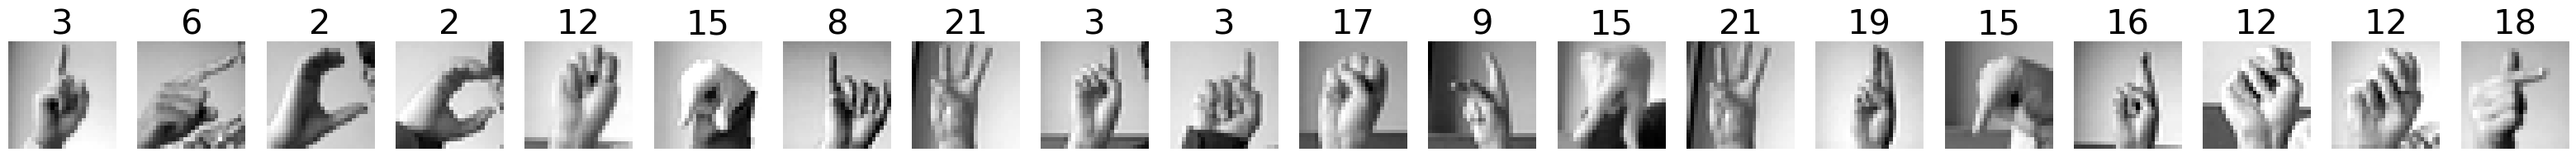

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    row = x_train[i]
    label = y_train[i]

    image = row.reshape(28,28)
    
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

# Preprocess the Image Data

## Normalize the Image Data

We are going to normalize the image data, meaning that their pixel values, instead of being between 0 and 255 as they are currently:

In [50]:
x_train.min()

0

In [51]:
x_train.max()

255

...should be floating point values between 0 and 1. Use the following cell to work. If you get stuck, look at the solution below.

In [52]:
x_train = x_train / 255
x_valid = x_valid / 255

## Categorize the Labels

We are going to categorically (one-hot) encode the labels. We can use the [keras.utils.to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) method to accomplish this by passing it the values to encode, and, the number of categories to encode it into.

In [53]:
import tensorflow.keras as keras
num_classes = 24
if not y_train.shape[-1] == 24:  # Avoid running multiple times
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_valid = keras.utils.to_categorical(y_valid, num_classes)

# Build and Fit the Model

## Build the Model

The data is all prepared, we have normalized images for training and validation, as well as categorically encoded labels for training and validation.

For this exercise we are going to build a sequential model that:
* Has a dense input layer. This layer should contain 512 neurons, use the `relu` activation function, and expect input images with a shape of `(784,)`.
* Has a dense output layer with neurons equal to the number of classes, using the `softmax` activation function.

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(units = 512, activation='relu', input_shape=(784,)))
model.add(Dense(units = num_classes, activation='softmax'))

## Summarizing the Model

Run the cell below to summarize the model you just created:

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 24)                12312     
                                                                 
Total params: 414232 (1.58 MB)
Trainable params: 414232 (1.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compiling the Model

We'll [compile](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile) our model with a loss function of [categorical crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) to reflect the fact that we want to fit into one of many categories, and measuring the accuracy of our model as it is fit:

In [56]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

## Train the Model

Use the model's `fit` method to train it for 20 epochs using the training and validation images and labels created above (~2 min).

In [57]:
hist=model.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/20


858/858 [==============================] - 5s 5ms/step - loss: 1.9885 - accuracy: 0.3885 - val_loss: 1.5861 - val_accuracy: 0.4923
Epoch 2/20
858/858 [==============================] - 4s 5ms/step - loss: 1.1339 - accuracy: 0.6346 - val_loss: 1.3213 - val_accuracy: 0.5763
Epoch 3/20
858/858 [==============================] - 4s 5ms/step - loss: 0.8145 - accuracy: 0.7372 - val_loss: 1.1267 - val_accuracy: 0.6594
Epoch 4/20
858/858 [==============================] - 4s 5ms/step - loss: 0.6042 - accuracy: 0.8019 - val_loss: 1.2076 - val_accuracy: 0.6304
Epoch 5/20
858/858 [==============================] - 4s 5ms/step - loss: 0.4564 - accuracy: 0.8493 - val_loss: 0.9796 - val_accuracy: 0.7183
Epoch 6/20
858/858 [==============================] - 4s 5ms/step - loss: 0.3528 - accuracy: 0.8847 - val_loss: 0.8872 - val_accuracy: 0.7499
Epoch 7/20
858/858 [==============================] - 4s 5ms/step - loss: 0.2782 - accuracy: 0.9103 - val_loss: 0.8782 - val_accuracy: 0.7552
Epoch 8/20
858/85

## Analyze Model Results

Key data to assess include how the loss function evolves during learning with each epoch to see if we are actually doing any training.  Also the accuracy (number of correct predictions divided by the total number of predictions) is a good metric to see how well our model is doing.  We usually want results for training and validation data.

In [58]:
# See what data we have saved in history from model run
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


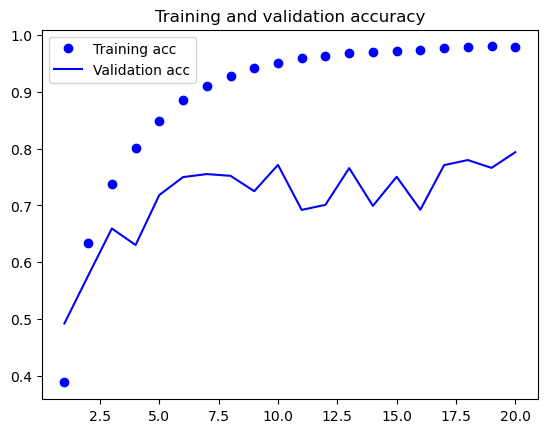

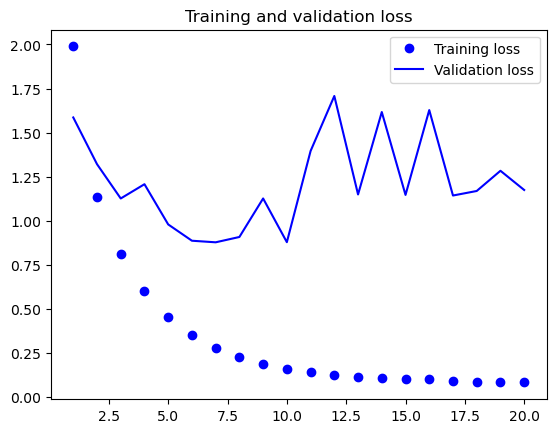

In [59]:
# Plot accuracy and loss
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

err_plot(acc,val_acc,loss,val_loss)

In [60]:
# Output top accuracy in validation data
max_acc = max(hist.history['val_accuracy'])
maxacc_index = hist.history['val_accuracy'].index(max_acc)+1
print("Best validation accuracy during run was: %1.2f on epoch %i"
      % (max_acc, maxacc_index))

Best validation accuracy during run was: 0.79 on epoch 20


## Discussion: What happened?

We can see that the training accuracy got to a fairly high level, but the validation accuracy was not as high. What happened here?

This is an example of the model learning to categorize the training data, but performing poorly against new data that it has not been trained on. Essentially, it is memorizing the dataset, but not gaining a robust and general understanding of the problem. This is a common issue called *overfitting*. We will discuss overfitting in the next two lectures, as well as some ways to address it.

# Summary

In this section you built your own neural network to perform image classification that is quite accurate. Congrats!

At this point we should be getting somewhat familiar with the process of loading data (incuding labels), preparing it, creating a model, and then training the model with prepared data.

# Question 1
Add another dense layer of 512 nodes and retrain and so you can compare to the best validation accuracy to what you got with the initial architecture above.  Provide a plot of train and validation accuracy and give value of best value from this NN vs. above NN.

**Solution to Question 1**

In [61]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Epoch 1/20
858/858 [==============================] - 4s 5ms/step - loss: 38.8036 - accuracy: 0.0495 - val_loss: 3.1745 - val_accuracy: 0.0272
Epoch 2/20
858/858 [==============================] - 4s 5ms/step - loss: 3.6648 - accuracy: 0.0593 - val_loss: 3.1620 - val_accuracy: 0.0315
Epoch 3/20
858/858 [==============================] - 4s 4ms/step - loss: 3.4885 - accuracy: 0.0686 - val_loss: 3.1736 - val_accuracy: 0.0323
Epoch 4/20
858/858 [==============================] - 4s 4ms/step - loss: 3.5013 - accuracy: 0.0741 - val_loss: 3.1173 - val_accuracy: 0.0487
Epoch 5/20
858/858 [==============================] - 4s 4ms/step - loss: 3.4918 - accuracy: 0.0863 - val_loss: 3.1009 - val_accuracy: 0.0542
Epoch 6/20
858/858 [==============================] - 4s 4ms/step - loss: 3.4564 - accuracy: 0.0918 - val_loss: 3.5677 - val_accuracy: 0.0697
Epoch 7/20
858/858 [==============================] - 4s 4ms/step - loss: 3.3527 - accuracy: 0.0970 - val_loss: 3.1473 - val_accuracy: 0.0365
Epoch

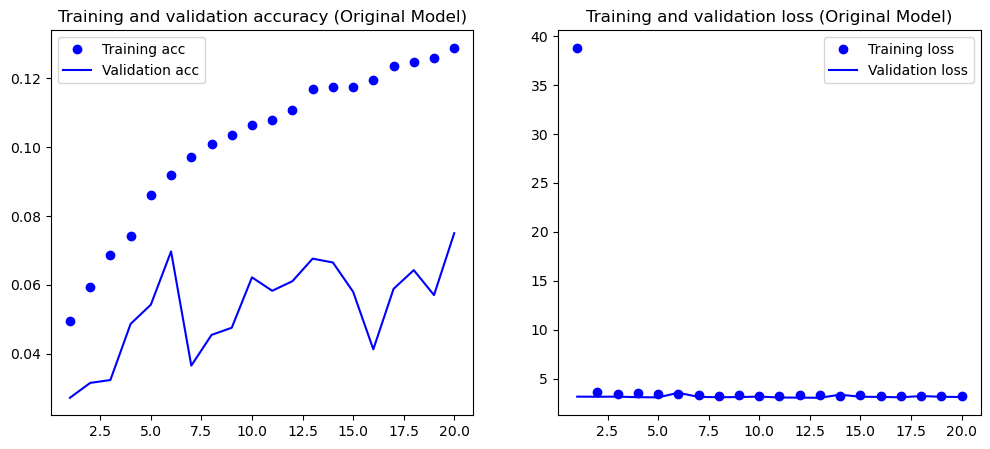

Epoch 1/20
858/858 [==============================] - 5s 6ms/step - loss: 17.4753 - accuracy: 0.0496 - val_loss: 3.1975 - val_accuracy: 0.0201
Epoch 2/20
858/858 [==============================] - 5s 6ms/step - loss: 3.3729 - accuracy: 0.0519 - val_loss: 3.1959 - val_accuracy: 0.0205
Epoch 3/20
858/858 [==============================] - 5s 6ms/step - loss: 3.4171 - accuracy: 0.0584 - val_loss: 3.1965 - val_accuracy: 0.0205
Epoch 4/20
858/858 [==============================] - 5s 6ms/step - loss: 3.2404 - accuracy: 0.0579 - val_loss: 3.1919 - val_accuracy: 0.0222
Epoch 5/20
858/858 [==============================] - 5s 6ms/step - loss: 3.2321 - accuracy: 0.0602 - val_loss: 3.2001 - val_accuracy: 0.0234
Epoch 6/20
858/858 [==============================] - 5s 6ms/step - loss: 3.2180 - accuracy: 0.0610 - val_loss: 3.1892 - val_accuracy: 0.0226
Epoch 7/20
858/858 [==============================] - 5s 6ms/step - loss: 3.2070 - accuracy: 0.0638 - val_loss: 3.2098 - val_accuracy: 0.0209
Epoch

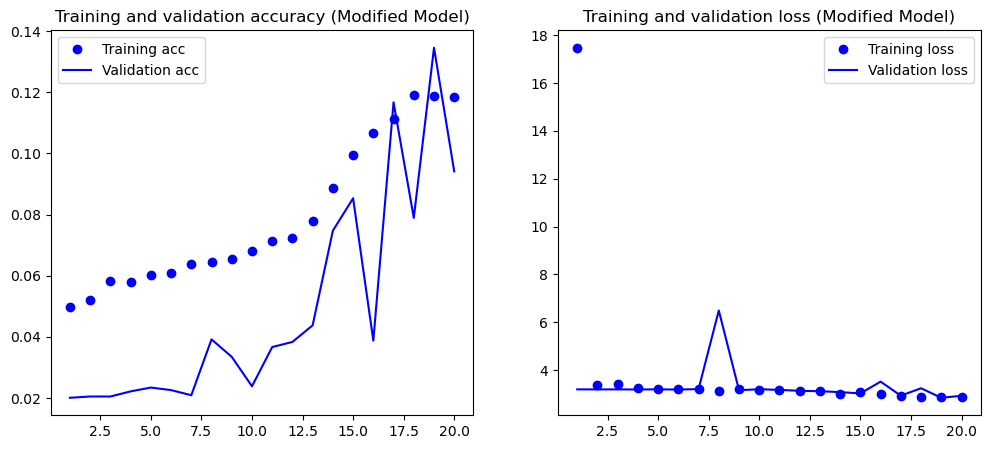

Best validation accuracy (Original Model): 0.08
Best validation accuracy (Modified Model): 0.13


In [62]:
# Load the dataset
train_df = pd.read_csv(os.path.join(path, 'data/asl_data/sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(path, 'data/asl_data/sign_mnist_valid.csv'))

# Separate labels and features
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']
x_train = train_df.values
x_valid = valid_df.values

# Convert labels to one-hot encoding
num_classes = 24  # Number of classes in the dataset
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# Define a function to plot training and validation accuracy and loss
def err_plot(acc, val_acc, loss, val_loss, title_suffix=''):
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title(f'Training and validation accuracy {title_suffix}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(f'Training and validation loss {title_suffix}')
    plt.legend()

    plt.show()

# Original Neural Network Architecture
model = Sequential([
    Dense(units=512, activation='relu', input_shape=(784,)),
    Dense(units=num_classes, activation='softmax')
])

# Compile the original model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Train the original model
hist = model.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_valid, y_valid))

# Plotting the results of the original model
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
err_plot(acc, val_acc, loss, val_loss, "(Original Model)")

# Modified Neural Network Architecture with an additional Dense layer
model_modified = Sequential([
    Dense(units=512, activation='relu', input_shape=(784,)),
    Dense(units=512, activation='relu'),  # Additional dense layer
    Dense(units=num_classes, activation='softmax')
])

# Compile the modified model
model_modified.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Train the modified model
hist_modified = model_modified.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_valid, y_valid))

# Plotting the results of the modified model
acc_modified = hist_modified.history['accuracy']
val_acc_modified = hist_modified.history['val_accuracy']
loss_modified = hist_modified.history['loss']
val_loss_modified = hist_modified.history['val_loss']
err_plot(acc_modified, val_acc_modified, loss_modified, val_loss_modified, "(Modified Model)")

# Comparing the best validation accuracies of the two models
max_acc_original = max(val_acc)
max_acc_modified = max(val_acc_modified)
print(f"Best validation accuracy (Original Model): {max_acc_original:.2f}")
print(f"Best validation accuracy (Modified Model): {max_acc_modified:.2f}")